# Image Recolorization using Autoencoder network

For any image, utiliting the autoencoder network can help us understand the latent variables that dictate the image pixels. Hence, in this project, we work on building an Encoder net to find the latent space of gray images and map them such that we colorize the gray images by training the network through Backpropagation utiliting same images in colour format

## About the dataset
The dataset is taken from Kaggle: Landscape color and grayscale images. Here we have a set of gray and color versions of same images to help us train the model. Here the images are of shape 160x160 pixels

## About the network
We use Tensorflow implementation of network to understand the process of building network architecture.


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt

In [3]:
IMG_Size = 160
IMG_Shape = [160, 160]

In [4]:
def load_images_from_dataset(folder):
    image_list = []
    for fileIndex in range(7129):
        img = cv2.imread("data/landscape Images/"+folder+"/"+str(fileIndex)+".jpg")
        if folder == "color":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            try:
                img = img.reshape(IMG_Size,IMG_Size,3)
            except:
                img = cv2.resize(img, (IMG_Size,IMG_Size))
                img = img.reshape(IMG_Size,IMG_Size,3)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            try:
                img = img.reshape(IMG_Size,IMG_Size,1)
            except:
                img = cv2.resize(img, (IMG_Size,IMG_Size))
                img = img.reshape(IMG_Size,IMG_Size,1)
        image_list.append(img)
    return image_list
color = np.empty((0,IMG_Size,IMG_Size,3))
gray = np.empty((0,IMG_Size,IMG_Size,1))
color = np.append(color,load_images_from_dataset(r"color"),0)
gray = np.append(gray,load_images_from_dataset(r"gray"),0)

## Plotting the images side-by-side to see both gray and colored versions from dataset

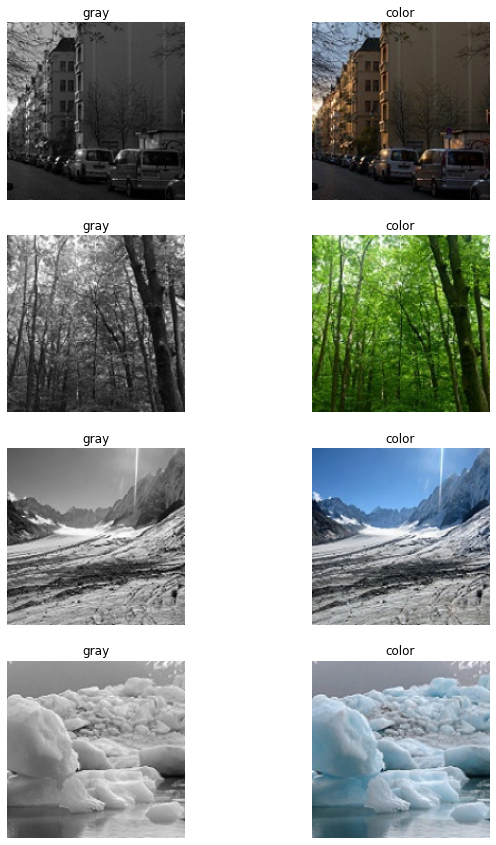

In [5]:
plt.figure(figsize=(10,15))
for i in range(0,8,2):
    ax = plt.subplot(4,2,i+1)
    plt.imshow(cv2.cvtColor(gray[i].astype('uint8'),cv2.COLOR_BGR2RGB))
    plt.title("gray")
    plt.axis("off")
    ax = plt.subplot(4,2,i+2)
    plt.imshow(color[i].astype('uint8'))
    plt.title("color")
    plt.axis("off")

In [6]:
color /= 255
gray /= 255

In [9]:
def Colorizer(input_shape):
    encoder_input = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32,(3,3),activation='relu', padding='same',strides=1)(encoder_input)
    x = layers.Conv2D(32,(3,3),activation='relu', padding='same',strides=2)(x)
    x = layers.Conv2D(64,(3,3),activation='relu', padding='same',strides=1)(x)
    x = layers.Conv2D(64,(3,3),activation='relu', padding='same',strides=2)(x)
    x = layers.Conv2D(128,(3,3),activation='relu', padding='same',strides=1)(x)
    x = layers.Conv2D(128,(3,3),activation='relu', padding='same',strides=2)(x)
    x = layers.Conv2D(256,(3,3),activation='relu', padding='same',strides=1)(x)
    x = layers.Conv2D(128,(3,3),activation='relu', padding='same',strides=1)(x)
    encoder_output = layers.Conv2D(64,(3,3), activation='relu',padding='same', strides=1)(x)
    
    x = layers.UpSampling2D((2,2))(encoder_output)
    x = layers.Conv2D(32,(3,3),activation='relu', padding='same',strides=1)(x)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.Conv2D(16,(3,3),activation='relu', padding='same',strides=1)(x)
    x = layers.Conv2D(3,(3,3),activation='sigmoid', padding='same',strides=1)(x)
    decoder_output = layers.UpSampling2D((2,2))(x)
    return tf.keras.Model(encoder_input,decoder_output,name="decoder")

colorizer = Colorizer((160,160,1))

In [11]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=3,
)
colorizer.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [12]:
colorizer.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 160, 160, 32)      320       
                                                                 
 conv2d_13 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 80, 80, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 40, 40, 64)        36928     
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 128)       1475

In [13]:
netTrain = colorizer.fit(gray[:6000],color[:6000],batch_size=2,epochs=15, callbacks = [earlystopping],validation_data=(gray[6000:],color[6000:]))

Epoch 1/15
3000/3000 [==============================] - 173s 58ms/step - loss: 0.0163 - accuracy: 0.4322 - val_loss: 0.0137 - val_accuracy: 0.5050
Epoch 2/15
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0132 - accuracy: 0.4508 - val_loss: 0.0121 - val_accuracy: 0.4820
Epoch 3/15
3000/3000 [==============================] - 173s 58ms/step - loss: 0.0125 - accuracy: 0.4618 - val_loss: 0.0118 - val_accuracy: 0.4231
Epoch 4/15
3000/3000 [==============================] - 173s 58ms/step - loss: 0.0119 - accuracy: 0.4679 - val_loss: 0.0122 - val_accuracy: 0.4457
Epoch 5/15
3000/3000 [==============================] - 173s 58ms/step - loss: 0.0114 - accuracy: 0.4720 - val_loss: 0.0108 - val_accuracy: 0.4660
Epoch 6/15
3000/3000 [==============================] - 174s 58ms/step - loss: 0.0111 - accuracy: 0.4738 - val_loss: 0.0105 - val_accuracy: 0.5119
Epoch 7/15
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0108 - accuracy: 0.4771 - val_loss: 0

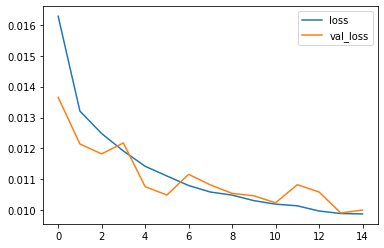

In [15]:
ax = plt.subplot(label=True)
plt.plot(netTrain.history["loss"], label = "loss")
plt.plot(netTrain.history["val_loss"], label = "val_loss")
plt.legend(["loss", "val_loss"])

In [16]:
colorized_imageset = colorizer.predict(gray[6000:])

36/36 [==============================] - 4s 103ms/step


## Displaying the given data and the predicted colorized output through the network

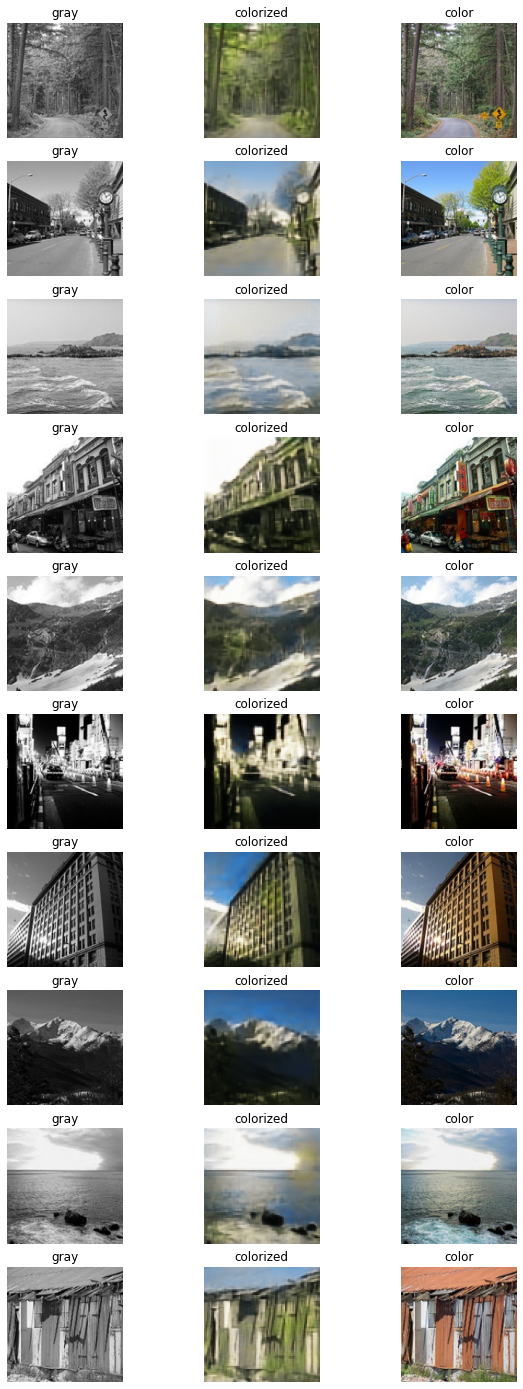

In [24]:
plt.figure(figsize=(10,25))
for i in range(0,30,3):
    ax = plt.subplot(10,3,i+1)
    plt.imshow(cv2.cvtColor(gray[6000+i].astype("float32"), cv2.COLOR_BGR2RGB))
    plt.title("gray")
    plt.axis('off')
    ax = plt.subplot(10,3,i+2)
    plt.imshow(colorized_imageset[i])
    plt.title("colorized")
    plt.axis('off')
    ax = plt.subplot(10,3,i+3)
    plt.imshow(color[6000+i])
    plt.title("color")
    plt.axis('off')